# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [24]:
df = pd.read_csv('nova_base.csv')

In [26]:
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,posse_de_veiculo_Y,posse_de_imovel_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,1,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,1,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [71]:
y = df[['mau_True']]

In [37]:
df.drop('mau_True', axis=1, inplace=True)

In [228]:
# Treino e Teste
X_train, x_teste, Y_train, y_teste = train_test_split(df, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [229]:
#1) definindo objeto
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [230]:
#2) treino 
clf = DecisionTreeClassifier(random_state=100, max_depth=3)

In [231]:
clf= clf.fit(X_train, Y_train)

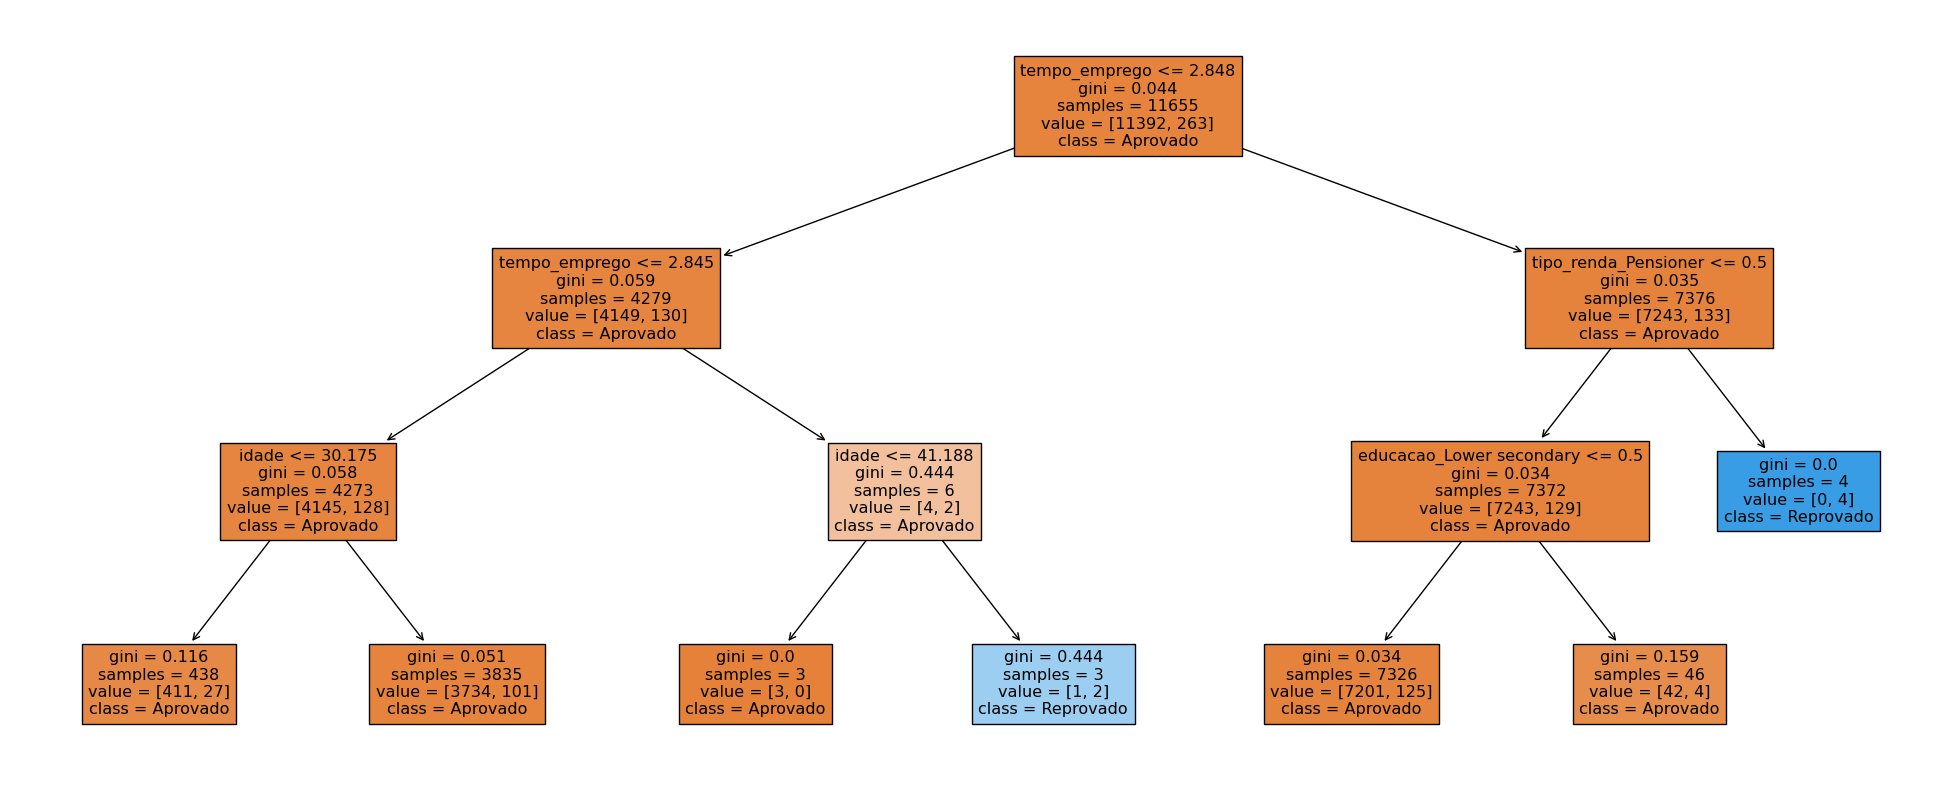

In [232]:
#3) visualização da árvore de treino
plt.figure(figsize=(25, 10))
plot_tree(clf, filled=True, class_names=['Aprovado', 'Reprovado'], feature_names=df.columns);

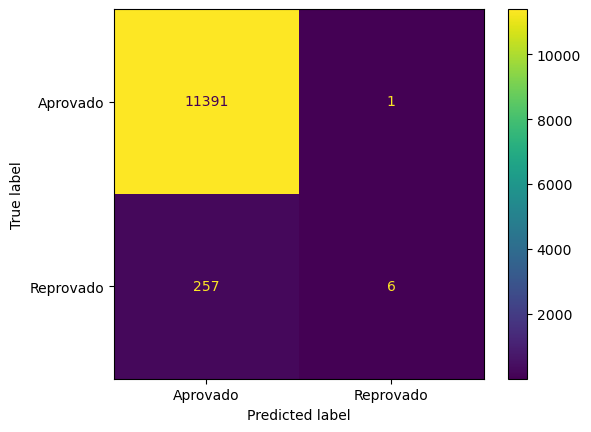

In [233]:
#4) matriz de confusao

predictions = clf.predict(X_train)
cm = confusion_matrix(Y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot()

In [235]:
#5) acurácia de treino
accuracy_score(Y_train, predictions)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [238]:
#1) classificação da base
from sklearn.metrics import classification_report
print(classification_report(y_teste, prev))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4868
           1       0.33      0.01      0.02       127

    accuracy                           0.97      4995
   macro avg       0.65      0.50      0.50      4995
weighted avg       0.96      0.97      0.96      4995



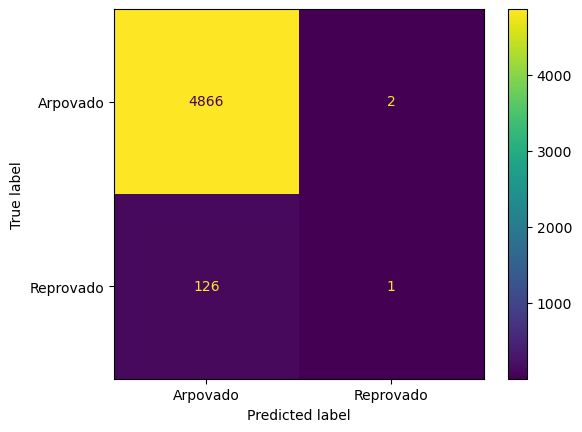

In [239]:
#2) vizualização da matriz de confusão
predictions = clf.predict(x_teste)
cm = confusion_matrix(y_teste, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Arpovado', 'Reprovado'])
disp.plot()

In [240]:
#3) acuracia de teste
accuracy_score(y_teste, predictions)

0.9743743743743744

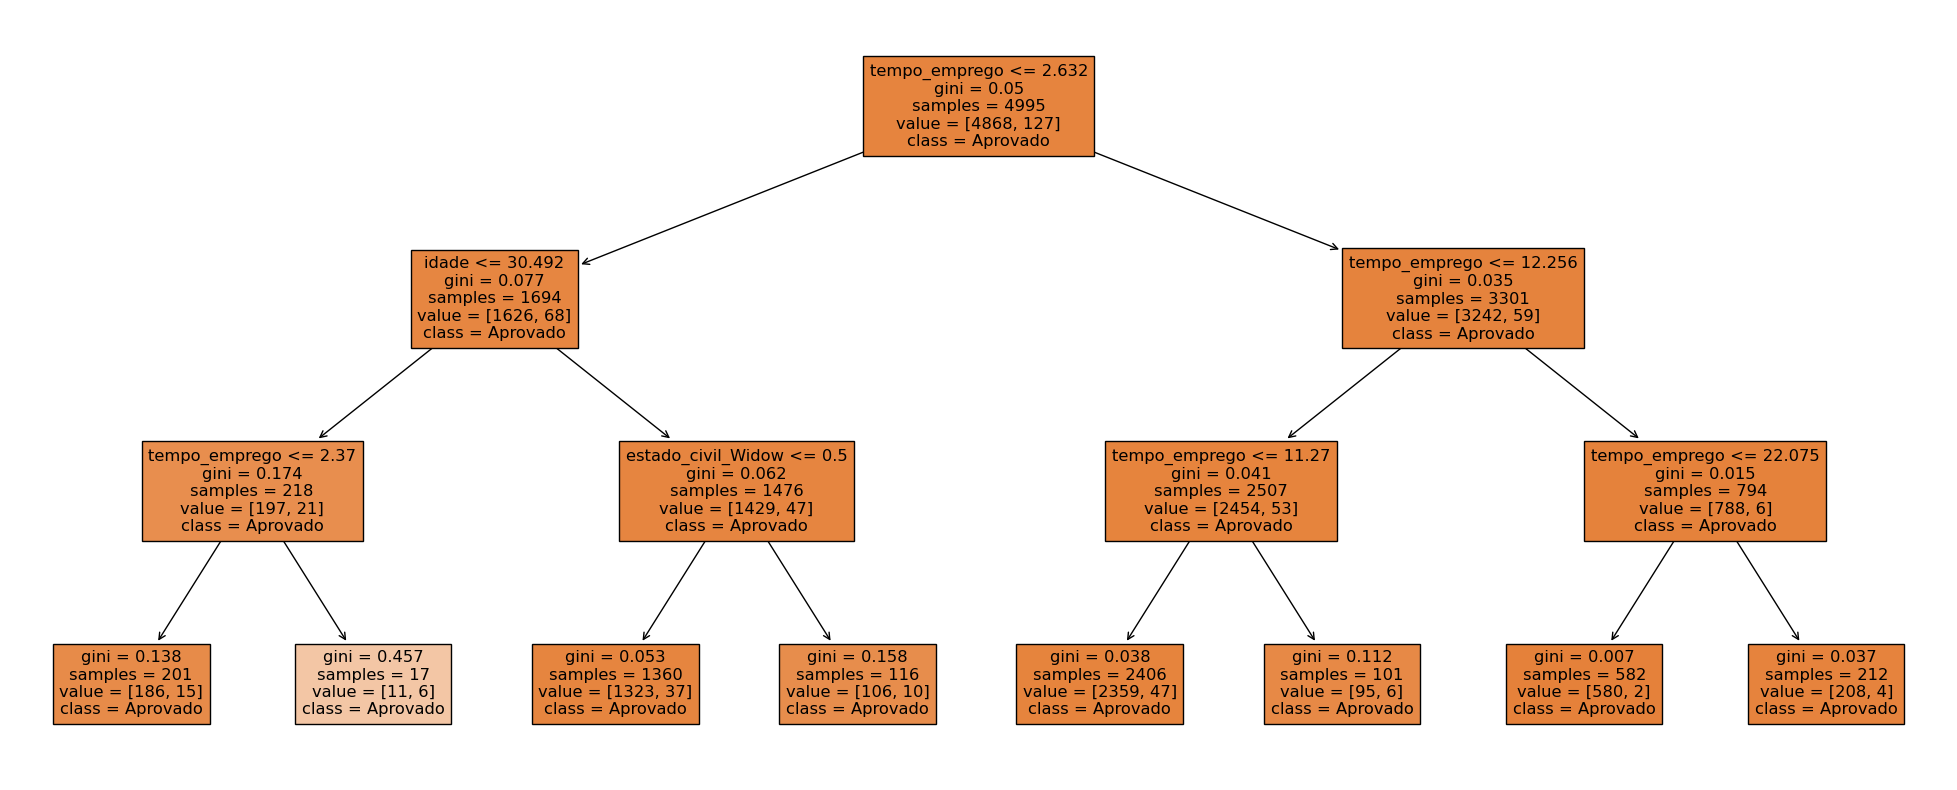

In [241]:
#4) nova arv
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3, random_state=123)
clf.fit(x_teste, y_teste)
plt.figure(figsize=(25, 10))
plot_tree(clf, filled=True, class_names=['Aprovado', 'Reprovado'], feature_names=df.columns);